# PROYECTO FINAL
### ALUMNO: MARCELO ALBERTO SANCHEZ ZARAGOZA

In [131]:
from PIL import Image
import numpy 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from os.path import isfile, join
ruta = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos'

contenido = os.listdir(ruta)

En la siguiente linea cargamos el nombre de todas las imagenes.

In [132]:
archivos = [nombre for nombre in contenido if isfile(join(ruta, nombre))]
#print(archivos)

In [91]:
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat

In [92]:
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage

Aqui se fue probando cada uno de los filtros de Gabor para decir cual era el mejor.

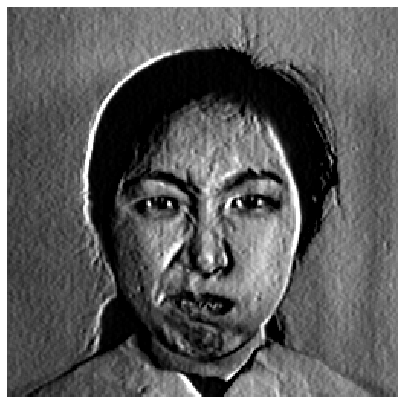

(256, 256)

In [93]:
###### creo que este es el buen filtro hoy 04/06/21 a las 01:37 am
import numpy as np
import cv2

# cv2.getGaborKernel(ksize, sigma, theta, lambda, gamma, psi, ktype)
# ksize - size of gabor filter (n, n)
# sigma - standard deviation of the gaussian function
# theta - orientation of the normal to the parallel stripes
# lambda - wavelength of the sunusoidal factor
# gamma - spatial aspect ratio
# psi - phase offset
# ktype - type and range of values that each pixel in the gabor kernel can hold

#g_kernel = cv2.getGaborKernel((30, 30), np.pi/4, np.pi/2, 2.5, 0.8, 1.0, ktype=cv2.CV_32F)
g_kernel = cv2.getGaborKernel((5, 5), np.pi/1, np.pi/1, 5.5, 3.8, 1.0, ktype=cv2.CV_32F)

img = cv2.imread("C:\\Users\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Proyecto\\datos\\KA.AN1.39.tiff")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

#cv2.imshow('image', img)
#cv2.imshow('filtered image', filtered_img)

h, w = g_kernel.shape[:2]
g_kernel = cv2.resize(g_kernel, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)
#cv2.imshow('gabor kernel (resized)', g_kernel)
cv2.waitKey(0)
cv2.destroyAllWindows()
##-----------------------------------------------------##
##-----------------------------------------------------##
# Para el primer caso: g_kernel = cv2.getGaborKernel((21, 21), np.pi, np.pi/2, 9.5, 0.8, 1.2, ktype=cv2.CV_32F)
# Segundo caso: cv2.getGaborKernel((21, 21), np.pi/4, np.pi/4, 9.5, 0.8, 1.0, ktype=cv2.CV_32F)
# Tercer caso: cv2.getGaborKernel((30, 30), np.pi/4, np.pi/2, 2.5, 0.8, 1.0, ktype=cv2.CV_32F)

im = np.array(filtered_img) # create a numpy ndarray from the Image object
imshow(im)
plt.axis('off'), show()
im.shape

Se le aplico el filtro de Gabor a las imagenes y se realizo la representación en un solo vector, los filtros que nos dieron resultados interesantes vienen agregados.

In [94]:
from scipy.signal import convolve2d
Todos_1 = []
#g_kernel = cv2.getGaborKernel((30, 30), np.pi/4, np.pi/2, 2.5, 0.8, 1.0, ktype=cv2.CV_32F)
#g_kernel = cv2.getGaborKernel((5, 5), np.pi/4, np.pi/2, 2.5, 0.8, 1.0, ktype=cv2.CV_32F)

#g_kernel = cv2.getGaborKernel((30, 30), np.pi/4, np.pi/2, 2.5, 0.8, 1.0, ktype=cv2.CV_32F)
#g_kernel = cv2.getGaborKernel((7, 7), np.pi/2, np.pi/4, 5.5, 0.8, 1.0, ktype=cv2.CV_32F)
g_kernel = cv2.getGaborKernel((5, 5), np.pi/1, np.pi/1, 5.5, 3.8, 1.0, ktype=cv2.CV_32F)

for r in range(180):
    #sinGabor = sinFilterBank[10]
    #g = genGabor((10,10), 1.1, np.pi/3, func=np.cos) 
    #res = convolve2d(zebra, g, mode='valid')
    img = cv2.imread(join(ruta, archivos[r]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #con este nos dio un buen valor en maquinas de soporte vectorial
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
    l = []
    p = filtered_img
    #for i in range(40):
    #    for j in range(190):
    #        l.append(p[i+50,j+30])
            
    for i in range(256):#256
        for j in range(256):
            l.append(p[i,j])
    
    #for i in range(256):
     #   for j in range(256):
      #      l.append(out[i,j])
    
    Todos_1.append(l)#filtered_img

In [95]:
Feo = np.array(Todos_1)
Feo.shape

(180, 65536)

In [96]:
v = pd.DataFrame(Feo)
v

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,77,61,67,78,89,79,82,82,89,87,...,68,80,70,62,82,101,98,72,81,108
1,92,82,74,86,103,97,82,87,93,86,...,87,81,78,78,62,51,63,98,104,75
2,72,65,74,89,89,83,78,86,90,83,...,98,104,99,81,85,98,108,101,99,95
3,94,103,84,74,83,103,102,97,77,76,...,87,100,94,104,118,124,96,93,93,116
4,90,89,106,116,104,79,75,89,94,91,...,118,123,120,110,96,95,113,109,105,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,133,137,128,121,117,116,120,129,128,128,...,98,59,72,109,132,110,89,99,118,127
176,139,135,131,139,137,130,129,134,137,146,...,122,115,97,114,113,116,121,129,122,129
177,135,130,126,118,124,126,146,136,135,138,...,164,149,137,125,130,118,108,114,125,126
178,117,114,128,128,114,117,117,129,127,121,...,177,163,146,142,134,120,114,122,121,113


En la siguiente lineas se realizo PCA y se agrega los gráficos para decirdir cuantas variables debemos tomar.

In [97]:
#Realizamos PCA
from sklearn.decomposition import PCA

pca = PCA()
# ajustar en los datos (estandarizados)
pca.fit(v)

PCA()

In [98]:
r = pca.transform(v)
comps = pd.DataFrame(data=r)
comps

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-1613.154947,2960.687524,-422.254078,-2548.208857,-2814.023988,-391.526452,-575.398847,943.691478,2259.320755,52.619697,...,37.600258,28.982562,23.894108,-45.643728,-42.833812,49.241035,64.154914,45.200515,-40.880980,1.238121e-12
1,-2936.477784,648.217030,-2446.011610,-1724.646765,898.474469,-378.987412,600.481705,1278.146785,1513.685110,4588.957275,...,-18.084983,28.888387,22.186976,-34.204310,-9.088898,-56.457016,-25.455983,-19.396518,14.108935,-4.618528e-14
2,-2999.287838,1204.046293,-268.979453,-2478.481555,-364.516487,-734.676561,578.665032,1853.939844,1067.876108,4254.062275,...,90.652892,-57.581663,-1.484873,13.572804,37.878922,41.566530,-17.147597,-0.009323,1.057856,2.359890e-12
3,-2275.864411,1078.741237,-1806.362048,-2225.997556,-695.818769,-739.753684,624.592841,2386.959062,932.496222,4339.414742,...,-129.209703,-151.680590,101.070107,103.836711,15.847976,58.475907,41.930817,21.612308,11.476462,1.142197e-12
4,-2764.067665,701.686552,-1490.216324,-2397.396042,-18.784021,-335.184689,469.390488,2007.335614,939.469405,4432.426254,...,101.167060,155.584205,-86.674504,-91.556044,23.969781,-31.787023,-28.249442,11.196648,3.284813,1.426415e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,6613.337171,-4401.931636,1994.043960,4145.579535,709.898912,-1003.649144,-1286.933022,2482.913001,-2716.467313,1779.875777,...,-42.567632,-66.676677,-56.070649,-82.826516,0.170746,1.161146,22.515361,-3.682958,-6.330336,1.236344e-12
176,7925.597037,-3921.805749,1595.123881,4721.378375,321.212521,-1008.774799,-1141.460916,3105.978586,-2767.835557,1316.940834,...,54.423039,58.627753,77.723431,86.200628,-7.894334,-54.611607,-14.226331,23.358145,-13.279530,-3.073097e-13
177,6708.921587,-3743.156734,1248.943995,3979.279486,1176.169374,-341.105530,-1179.736583,4009.492660,-478.243283,1628.584894,...,-91.547584,48.017127,-23.156082,-37.427485,-80.752515,-93.073153,-20.967760,11.791185,-10.471543,6.750156e-14
178,5785.461387,-4147.783959,2529.948192,4527.450677,-284.472657,-500.183092,-1394.615254,4210.508190,-1367.376482,1067.749124,...,4.849253,19.152126,10.885600,16.662174,50.109779,6.452019,62.439617,-25.654948,-5.116573,1.634248e-13


In [99]:
dat = {'PC':range(0,180),'std':np.sqrt(pca.explained_variance_), 'var_prop':pca.explained_variance_ratio_, 
       'cum_prop':np.cumsum(pca.explained_variance_ratio_)}
stds = pd.DataFrame(dat)
stds

,PC,std,var_prop,cum_prop
0,0,3.905989e+03,1.260737e-01,0.126074
1,1,3.678167e+03,1.117957e-01,0.237869
2,2,3.110834e+03,7.996794e-02,0.317837
3,3,2.476344e+03,5.067390e-02,0.368511
4,4,2.230189e+03,4.110037e-02,0.409612
...,...,...,...,...
175,175,2.464389e+02,5.018581e-04,0.998814
176,176,2.385038e+02,4.700595e-04,0.999285
177,177,2.176461e+02,3.914389e-04,0.999676
178,178,1.980162e+02,3.240141e-04,1.000000


Observamos cuantas variables podemos tomar

Text(0.5, 1.0, 'Varianza acumulada')

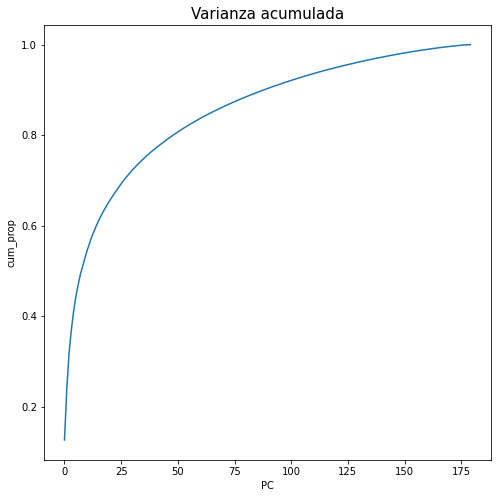

In [100]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.lineplot(x="PC", y="cum_prop", data=stds)
plt.title('Varianza acumulada', fontsize=15)

Seleccionamos las primeras 100 columnas.

In [101]:
datos_lim = comps.iloc[:,0:100]
datos_lim

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1613.154947,2960.687524,-422.254078,-2548.208857,-2814.023988,-391.526452,-575.398847,943.691478,2259.320755,52.619697,...,226.151295,61.568868,297.674719,-80.484209,102.438283,-603.542553,-1136.761671,491.275374,-624.973618,-32.667358
1,-2936.477784,648.217030,-2446.011610,-1724.646765,898.474469,-378.987412,600.481705,1278.146785,1513.685110,4588.957275,...,-389.964940,440.639393,-234.431011,-766.138439,-88.046043,412.008453,543.510054,321.618310,-133.494684,-828.493575
2,-2999.287838,1204.046293,-268.979453,-2478.481555,-364.516487,-734.676561,578.665032,1853.939844,1067.876108,4254.062275,...,890.464084,-448.891241,-178.728452,1127.000529,-711.937892,-224.016754,-266.962606,49.319663,516.476830,1187.105255
3,-2275.864411,1078.741237,-1806.362048,-2225.997556,-695.818769,-739.753684,624.592841,2386.959062,932.496222,4339.414742,...,-630.215466,-52.526665,-191.617451,-719.341358,390.993223,-313.746565,338.631361,694.055885,-575.357936,-598.365540
4,-2764.067665,701.686552,-1490.216324,-2397.396042,-18.784021,-335.184689,469.390488,2007.335614,939.469405,4432.426254,...,-256.536750,245.776845,278.152218,-474.938018,344.484665,250.560757,954.381856,-192.821876,609.070634,-758.235634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,6613.337171,-4401.931636,1994.043960,4145.579535,709.898912,-1003.649144,-1286.933022,2482.913001,-2716.467313,1779.875777,...,2.115311,116.382928,148.648354,-71.906130,20.296087,-9.727526,-573.934836,-214.097656,-186.966104,-136.410467
176,7925.597037,-3921.805749,1595.123881,4721.378375,321.212521,-1008.774799,-1141.460916,3105.978586,-2767.835557,1316.940834,...,190.915226,-177.561418,65.849962,-50.274513,345.990127,155.033758,160.505667,-156.208521,404.627054,-205.952375
177,6708.921587,-3743.156734,1248.943995,3979.279486,1176.169374,-341.105530,-1179.736583,4009.492660,-478.243283,1628.584894,...,-125.007994,143.023242,-202.594976,98.621393,41.150174,131.497468,727.386722,23.575206,134.546528,-14.939304
178,5785.461387,-4147.783959,2529.948192,4527.450677,-284.472657,-500.183092,-1394.615254,4210.508190,-1367.376482,1067.749124,...,-467.756947,-58.944682,-22.685120,79.915962,17.446148,-180.676734,-419.475659,-74.341050,-109.249291,-237.789780


In [102]:
info = pd.read_csv('class.csv',encoding='latin1')
info

,Unnamed: 0,file,semantic.expression,file.expression
0,1,KA.AN1.39.tiff,ANG,ANG
1,2,KA.AN2.40.tiff,ANG,ANG
2,3,KA.AN3.41.tiff,DIS,ANG
3,4,KA.DI1.42.tiff,DIS,DIS
4,5,KA.DI2.43.tiff,DIS,DIS
...,...,...,...,...
175,176,YM.SA2.56.tiff,SAD,SAD
176,177,YM.SA3.57.tiff,SAD,SAD
177,178,YM.SU1.58.tiff,SUR,SUR
178,179,YM.SU2.59.tiff,SUR,SUR


In [123]:
m = []
for i in range(180):
    if(i<19):
        m.append('KA')
    elif(19<= i and i< 38):
        m.append('KL')
    elif(37<= i and i< 57):
        m.append('KM')
    elif(56<= i and i< 74):
        m.append('KR')
    elif(73<= i and i< 92):
        m.append('MK')
    elif(91<= i and i< 110):
        m.append('NA')
    elif(109<= i and i< 127):
        m.append('NM')
    elif(126<= i and i< 145):
        m.append('TM')
    elif(144<= i and i< 163):
        m.append('UY')
    elif(162<= i and i< 180):
        m.append('KM')

g = {'PC':range(0,180), 'pc1':comps.iloc[:,0], 'pc2':comps.iloc[:,1], 'Expresión':info.iloc[:,3], 'Persona':m}
G = pd.DataFrame(g)
#G
#G['Persona']= m

Realizamos las representaciones de las imagenes en dos componentes y tomamos en cuenta el sentimiento y el nombre de la persona. 

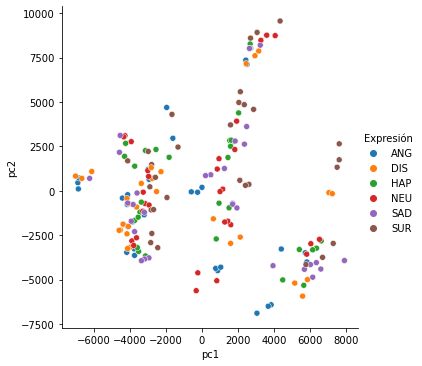

In [124]:
import seaborn as sns
#fig.add_subplot(321)
sns.relplot(x='pc1', y='pc2', hue='Expresión',data=G)

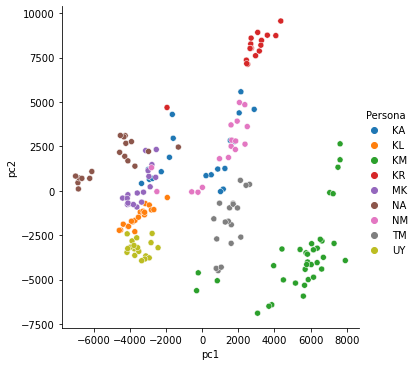

In [125]:
sns.relplot(x='pc1', y='pc2', hue='Persona',data=G)

Dividimos nuestro conjunto de datos en dos grupos, uno de entrenamiento y otro de prueba.

In [126]:
from sklearn.model_selection import train_test_split
y = info.iloc[:,3]
X_train, X_test = train_test_split(datos_lim, test_size=0.2, train_size=0.8, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, train_size=0.8, random_state=42)

Comenzamos a aplicar cada uno de los métodos de aprendizaje supervisado.

### Redes Neuronales

In [127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

hls = [10] #[10,3]
# regularización
a = 0.5
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, 
                    random_state=0, alpha=a, max_iter=500).fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ANG       0.50      1.00      0.67         3
         DIS       1.00      0.38      0.55         8
         HAP       0.67      0.67      0.67         3
         NEU       0.30      0.43      0.35         7
         SAD       0.60      0.50      0.55         6
         SUR       0.56      0.56      0.56         9

    accuracy                           0.53        36
   macro avg       0.60      0.59      0.56        36
weighted avg       0.62      0.53      0.53        36



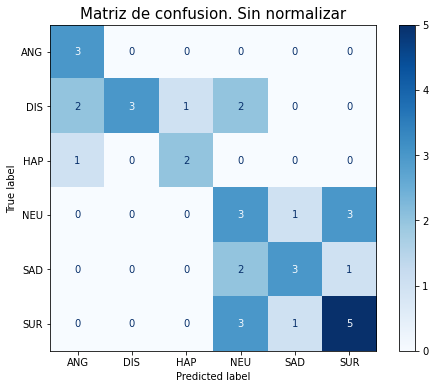

In [128]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

### Maquinas de Soporte Vectorial

              precision    recall  f1-score   support

         ANG       0.75      1.00      0.86         3
         DIS       1.00      0.75      0.86         8
         HAP       1.00      1.00      1.00         3
         NEU       0.88      1.00      0.93         7
         SAD       0.80      0.67      0.73         6
         SUR       0.90      1.00      0.95         9

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.90      0.89      0.88        36



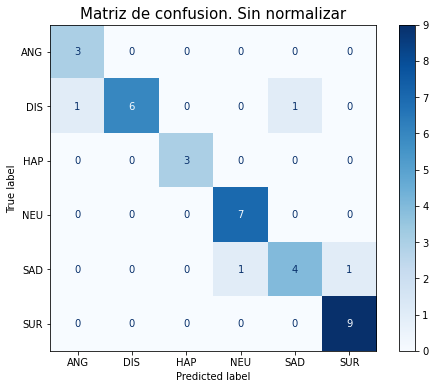

In [129]:
from sklearn.svm import SVC 
clf = SVC(kernel='rbf', C=9.5)
clf.fit(X_train, y_train)
y_pred_hat = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred_hat))

plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

### Arboles de Clasificación

In [107]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


alpha_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01) #0.001
alpha_tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(alpha_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(alpha_tree.score(X_test, y_test)))

Accuracy on training set: 0.958
Accuracy on test set: 0.444


### AdaBoost

In [108]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train, y_train)

y_hat = ada_clf.predict(X_test)
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         ANG       0.75      1.00      0.86         3
         DIS       1.00      0.50      0.67         8
         HAP       0.38      1.00      0.55         3
         NEU       0.71      0.71      0.71         7
         SAD       0.44      0.67      0.53         6
         SUR       1.00      0.44      0.62         9

    accuracy                           0.64        36
   macro avg       0.71      0.72      0.66        36
weighted avg       0.78      0.64      0.65        36



### LDA

              precision    recall  f1-score   support

         ANG       0.50      1.00      0.67         3
         DIS       1.00      0.62      0.77         8
         HAP       0.50      0.33      0.40         3
         NEU       0.88      1.00      0.93         7
         SAD       0.56      0.83      0.67         6
         SUR       0.83      0.56      0.67         9

    accuracy                           0.72        36
   macro avg       0.71      0.72      0.68        36
weighted avg       0.78      0.72      0.72        36



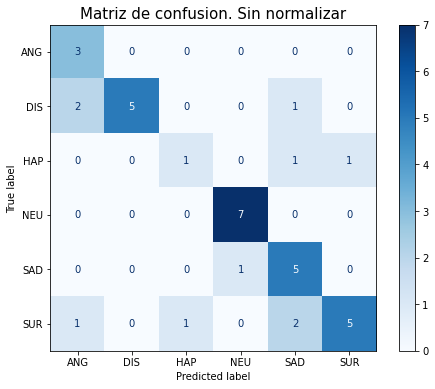

In [130]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train, y_train).predict(X_test)

print(metrics.classification_report(y_test, y_pred))

plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(lda, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

### QDA

In [110]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_QDA = qda.fit(X_train, y_train).predict(X_test)

print(metrics.classification_report(y_test, y_QDA))

              precision    recall  f1-score   support

         ANG       0.11      0.33      0.17         3
         DIS       0.00      0.00      0.00         8
         HAP       0.00      0.00      0.00         3
         NEU       0.20      0.14      0.17         7
         SAD       0.29      0.33      0.31         6
         SUR       0.67      0.22      0.33         9

    accuracy                           0.17        36
   macro avg       0.21      0.17      0.16        36
weighted avg       0.26      0.17      0.18        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Buscamos una representación con T-SNE

[t-SNE] Computing 179 nearest neighbors...
[t-SNE] Indexed 180 samples in 0.010s...
[t-SNE] Computed neighbors for 180 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 180 / 180
[t-SNE] Mean sigma: 53.443037
[t-SNE] KL divergence after 250 iterations with early exaggeration: 111.564713
[t-SNE] KL divergence after 1000 iterations: 0.992901


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

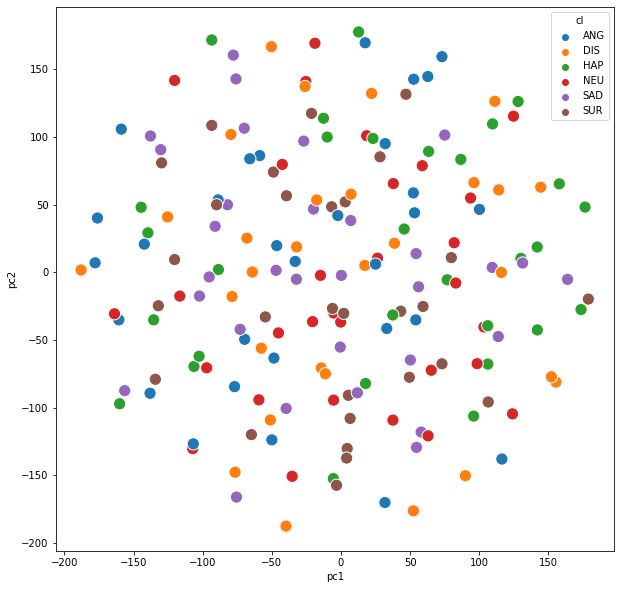

In [134]:
from sklearn.manifold import TSNE
### estandarizamos los datos
#scaler = StandardScaler(with_mean=True,with_std=True)
#p = scaler.fit_transform(X_sphere)

#np.random.seed(0)
tsne = TSNE(n_components=3,perplexity=1500, verbose = 1)
X_tsne = tsne.fit_transform(v/255)#

tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'cl':info.iloc[:,3]})

fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.5)
#sns.lineplot(x='pc1', y='pc2', data = tsne_dataset, hue='nombre', legend = 'brief',
#               style = 'nombre', markers = True)

sns.scatterplot(x='pc1', y='pc2', data = tsne_dataset, hue='cl', s=150, legend = 'brief')

In [135]:
nn = pd.DataFrame(X_tsne)
nn

,0,1,2
0,-177.845856,7.067095,-87.813103
1,-48.528053,-63.266609,141.568954
2,52.303181,58.709789,36.695942
3,-68.059471,25.308451,-99.959412
4,114.055237,60.932289,11.614481
...,...,...,...
175,-72.963608,-42.035721,70.375946
176,0.220159,-2.191116,-97.412224
177,49.407658,-77.438675,30.949232
178,1.933524,-30.268167,126.690956


In [136]:
from sklearn.model_selection import train_test_split
y = info.iloc[:,3]
X_train, X_test = train_test_split(nn, test_size=0.2, train_size=0.8, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, train_size=0.8, random_state=42)

### Volvemos a aplicar los mismos métodos de aprendizaje

### Redes Neuronales

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

hls = [10] #[10,3]
# regularización
a = 0.5
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, 
                    random_state=0, alpha=a, max_iter=500).fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ANG       0.14      0.67      0.24         3
         DIS       0.00      0.00      0.00         8
         HAP       0.20      0.33      0.25         3
         NEU       0.00      0.00      0.00         7
         SAD       0.40      0.33      0.36         6
         SUR       0.00      0.00      0.00         9

    accuracy                           0.14        36
   macro avg       0.12      0.22      0.14        36
weighted avg       0.10      0.14      0.10        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Maquinas de soporte V

              precision    recall  f1-score   support

         ANG       0.00      0.00      0.00         3
         DIS       0.00      0.00      0.00         8
         HAP       0.14      0.33      0.20         3
         NEU       0.40      0.29      0.33         7
         SAD       0.17      0.17      0.17         6
         SUR       0.22      0.22      0.22         9

    accuracy                           0.17        36
   macro avg       0.16      0.17      0.15        36
weighted avg       0.17      0.17      0.16        36



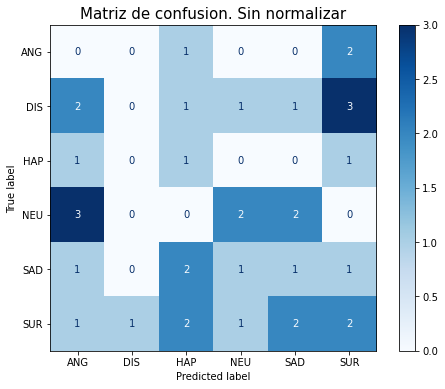

In [138]:
from sklearn.svm import SVC 
clf = SVC(kernel='rbf', C=2.5)
clf.fit(X_train, y_train)
y_pred_hat = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_hat))
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

### Arboles de clasificación

In [139]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


alpha_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01) #0.001
alpha_tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(alpha_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(alpha_tree.score(X_test, y_test)))

Accuracy on training set: 0.722
Accuracy on test set: 0.194


### AdaBoost

In [140]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train, y_train)

y_hat = ada_clf.predict(X_test)
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         ANG       0.17      0.67      0.27         3
         DIS       0.33      0.12      0.18         8
         HAP       0.12      0.33      0.18         3
         NEU       0.50      0.29      0.36         7
         SAD       0.00      0.00      0.00         6
         SUR       0.17      0.11      0.13         9

    accuracy                           0.19        36
   macro avg       0.22      0.25      0.19        36
weighted avg       0.24      0.19      0.18        36



### LDA

In [141]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train, y_train).predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ANG       0.10      0.33      0.15         3
         DIS       0.00      0.00      0.00         8
         HAP       0.08      0.33      0.13         3
         NEU       0.33      0.29      0.31         7
         SAD       0.40      0.33      0.36         6
         SUR       0.00      0.00      0.00         9

    accuracy                           0.17        36
   macro avg       0.15      0.21      0.16        36
weighted avg       0.15      0.17      0.14        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### QDA

In [142]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_QDA = qda.fit(X_train, y_train).predict(X_test)

print(metrics.classification_report(y_test, y_QDA))

              precision    recall  f1-score   support

         ANG       0.12      0.33      0.18         3
         DIS       0.00      0.00      0.00         8
         HAP       0.14      0.33      0.20         3
         NEU       0.43      0.43      0.43         7
         SAD       0.75      0.50      0.60         6
         SUR       0.22      0.22      0.22         9

    accuracy                           0.28        36
   macro avg       0.28      0.30      0.27        36
weighted avg       0.29      0.28      0.27        36



# Nuevo filtro-paso alto
Probamos un nuevo filtro

In [143]:
import cv2
import numpy as np

img = cv2.imread("C:\\Users\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Proyecto\\datos\\KA.AN1.39.tiff",0)
A = img.copy()/255

m,n = A.shape
B = np.zeros((m,n));
i=2
j=2
h = np.array([[0,-1,0],[-1, 5, -1], [0,-1,0]])
for i in range(m-1):
    for j in range(n-1):
        B[i,j]=(h[0,0]*A[i-1,j-1] +h[0,1]*A[i-1,j] +h[0,2]*A[i-1, j+1] +h[1,0]*A[i, j-1] + h[1,1]*A[i,j] 
                +h[1,2]*A[i, j+1] +h[2,0]*A[i+1, j+1] +h[2,1]*A[i+1,j] +h[2,2]*A[i+1, j+1])
        B[i,j]=abs(B[i,j])
        
cv2.imshow('img',img)
cv2.imshow('imgb',B)

cv2.waitKey(0)
cv2.destroyAllWindows()

Definimos una función que nos va a ayudar a aplicar el filtro

In [144]:
def Kobe(img):
    A = img.copy()/255

    m,n = A.shape
    B = np.zeros((m,n));
    i=2
    j=2


    h = np.array([[0,-1,0],[-1, 5, -1], [0,-1,0]])
    for i in range(m-1):
        for j in range(n-1):
            B[i,j]=(h[0,0]*A[i-1,j-1] +h[0,1]*A[i-1,j] +h[0,2]*A[i-1, j+1] +h[1,0]*A[i, j-1] + h[1,1]*A[i,j] 
                +h[1,2]*A[i, j+1] +h[2,0]*A[i+1, j+1] +h[2,1]*A[i+1,j] +h[2,2]*A[i+1, j+1])
            B[i,j]=abs(B[i,j])
    #cv2.imshow('img',img)
    #cv2.imshow('imgb',B)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    return B

In [145]:
img = cv2.imread("C:\\Users\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Proyecto\\datos\\KL.HA2.159.tiff",0)
xx = pd.DataFrame(Kobe(img))
#xx

In [ ]:
Todos_2 = []
for r in range(180):
    img = cv2.imread(join(ruta, archivos[r]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #con este nos dio un buen valor en maquinas de soporte vectorial
    filtered_img = Kobe(img)
    
    #out = Gabor_process(img)
    
    l = []
    p = filtered_img
    #for i in range(40):
    #    for j in range(190):
    #        l.append(p[i+50,j+30])
            
    for i in range(255):
        for j in range(255):
            l.append(p[i,j])
    
    #for i in range(256):
     #   for j in range(256):
      #      l.append(out[i,j])
    
    Todos_2.append(l)#filtered_img

In [ ]:
c1 = pd.DataFrame(Todos_2)
c1

Volvemos a realizar lo mismo pero ahora con esta nueva representación

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
# ajustar en los datos (estandarizados)
pca.fit(c1)

In [ ]:
r = pca.transform(c1)
comps = pd.DataFrame(data=r)
comps

In [ ]:
dat = {'PC':range(0,180),'std':np.sqrt(pca.explained_variance_), 'var_prop':pca.explained_variance_ratio_, 
       'cum_prop':np.cumsum(pca.explained_variance_ratio_)}
stds = pd.DataFrame(dat)
stds

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.lineplot(x="PC", y="cum_prop", data=stds)
plt.title('Varianza acumulada', fontsize=15)

In [ ]:
datos_lim2 = comps.iloc[:,0:120]
datos_lim2

In [ ]:
m = []
for i in range(180):
    if(i<19):
        m.append('KA')
    elif(19<= i and i< 38):
        m.append('KL')
    elif(37<= i and i< 57):
        m.append('KM')
    elif(56<= i and i< 74):
        m.append('KR')
    elif(73<= i and i< 92):
        m.append('MK')
    elif(91<= i and i< 110):
        m.append('NA')
    elif(109<= i and i< 127):
        m.append('NM')
    elif(126<= i and i< 145):
        m.append('TM')
    elif(144<= i and i< 163):
        m.append('UY')
    elif(162<= i and i< 180):
        m.append('KM')

In [ ]:
info = pd.read_csv('class.csv',encoding='latin1')
info

In [ ]:
g = {'PC':range(0,180), 'pc1':comps.iloc[:,0], 'pc2':comps.iloc[:,3], 'Expresión':info.iloc[:,3], 'Persona':m}
G = pd.DataFrame(g)
G

In [ ]:
import seaborn as sns
#fig.add_subplot(321)
sns.relplot(x='pc1', y='pc2', hue='Persona',data=G)

In [ ]:
from sklearn.model_selection import train_test_split
y = info.iloc[:,3]
X_train2, X_test2 = train_test_split(datos_lim2, test_size=0.2, train_size=0.8, random_state=42)
y_train2, y_test2 = train_test_split(y, test_size=0.2, train_size=0.8, random_state=42)

### Redes Neu

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

hls = [10] #[10,3]
# regularización
a = 0.5
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, 
                    random_state=0, alpha=a, max_iter=500).fit(X_train2, y_train2)

y_pred = mlp.predict(X_test2)
print(metrics.classification_report(y_test2, y_pred))

### Maquinas de soporte v.

In [ ]:
from sklearn.svm import SVC 
clf = SVC(kernel='rbf', C=2.5)
clf.fit(X_train2, y_train2)
y_pred_hat = clf.predict(X_test2)

In [ ]:
print(metrics.classification_report(y_test2, y_pred_hat))

### Arboles de decisión

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train2, y_train2)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
# austamos el árbol correspondiente
alpha_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0001) #0.001
alpha_tree.fit(X_train2, y_train2)
print("Accuracy on training set: {:.3f}".format(alpha_tree.score(X_train2, y_train2)))
print("Accuracy on test set: {:.3f}".format(alpha_tree.score(X_test2, y_test2)))

### AdaBoost

In [ ]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train2, y_train2)

In [ ]:
y_hat = ada_clf.predict(X_test2)
print(metrics.classification_report(y_test2, y_hat))

### LDA

In [ ]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train, y_train).predict(X_test)
print(metrics.classification_report(y_test, y_pred))

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(lda, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

### QDA

In [ ]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_QDA = qda.fit(X_train, y_train).predict(X_test)
#y_QDA
print(metrics.classification_report(y_test, y_QDA))